<a href="https://colab.research.google.com/github/andreslagosb-ux/Regresion_Lineal/blob/main/Regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Taller 3: Regresión Lineal y Conceptos Fundamentales




## Instrucciones Generales

**Fecha de entrega:** 20 de septiembre.
**Tiempo disponible:** Tienen dos clases y el fin de semana para completar el taller.

1.  **Trabajo en Grupo:** Este taller se debe realizar en los grupos previamente definidos.
2.  **Repositorio en GitHub:** Cada grupo debe crear un repositorio en GitHub.
    * Una sola persona del grupo es responsable de crearlo.
    * El repositorio debe llamarse **`Regresion_Lineal`**.
    * Este archivo debe ser subido al repositorio con el nombre **`Regresion_Lineal.ipynb`**.
    * **Alternativa:** Si tienen complicaciones con GitHub, pueden enviar el enlace del cuaderno de Google Colab al aula virtual.
3.  **Actividad a Mano (20% de la nota):**
    * La asistencia a clase es **obligatoria**.
    * Se realizará una actividad práctica de regresión lineal a mano.
    * Cada integrante del grupo deberá firmar la hoja de la actividad, la cual constituye el 20% de la nota de este taller.

---

## **Parte 1: Definición del Problema**

Piensa en tu experiencia académica o laboral en un área de operaciones y elige **un problema** relacionado con inventarios, calidad, mantenimiento o productividad.

1.  Indica cuál es tu variable dependiente **$Y$** (aquello que quieres predecir o clasificar).
2.  Lista entre 3 y 5 variables independientes **$X$** que medirías para predecir $Y$.
3.  Especifica si tu problema es de **regresión** (predecir un valor numérico) o de **clasificación**.

**Respuesta (escribe aquí):** En Merqueo uno de los problemas mas criticos que se presentaba era evitar que los productos no estuvieran disponibles al cliente.


**Respuesta 1:** Nivel de inventario disponible de un producto en unidades (prediccion de inventario para evitar quedarse sin producto)


**Respuesta 2:**
1.  Promedio historico de demanda :ventas pasadas por dias o semanas
2.  Frecuencia de entrega del proveedor
3.  Tiempo de entrega del proveedor (lead time): dias de entrega desde pedido hasta llegada.
4.  Promociones

**Respuesta 3:** El problema es de regresion ya que que se quiere predecir la cantidad de inventario necesario.

---

## **Parte 2: Preprocesamiento de Datos y *Leakage***

Basado en el caso que definiste en la Parte 1:

1.  Lista entre 3 y 5 **transformaciones** que aplicarías a tus datos (ej. imputación de valores faltantes, codificación de variables categóricas, escalado, creación de *lags*, etc.) y **justifica por qué** cada una es necesaria.
2.  Señala un posible riesgo de ***data leakage*** (fuga de datos) en tu plan y explica cómo lo evitarías usando un *pipeline* de preprocesamiento.

**Respuesta (escribe aquí):**

**Respuesta 1:**
1.  Imputacion de valores faltantes: Los datos de ventas históricas o tiempos de entrega pueden presentar vacíos en la información por motivo de que no se registrara venta o entrega en algún día o semana en específico. Es importante llenar estos espacios valor de 0 en cuestión de las ventas y con la media en tiempos de entrega para no afectar el modelo.
2. Codificación de variables categóricas: Promociones (Si=1/No=0) ya que este tipo de modelos necesitan valores numéricos.
3. Escalado de variables numéricas: estandarizando las variables ventas históricas 0-10.000 y el tiempo de entrega de 0 a 30 días ya que los algoritmos necesitan estandarizar los datos.
4.  Creación de lags y medias móviles: definición de la demanda en los últimos 7 días y el promedio de venta semanal con esto se pueden revisar patrones de estacionalidad o tendencias pasadas que ayuden a la predicción.  

**Respuesta 2:**
1.  **Riesgo:** se puede accidentalmente incluir las ventas de mañana para realizar la prediccion hoy.
2.  **Como evitarlo:** Un pipeline de preprocesamiento encadena transformaciones y garantiza que todas las estadísticas o parámetros necesarios, se calculen únicamente durante el fit sobre el conjunto de entrenamiento. Luego cuando se aplica el pipeline, reutiliza los parámetros aprendidos sin volver a mirar los datos futuros esto evita la fuga de datos y nos brinda estimaciones más reales del rendimiento del modelo.

---

## **Parte 3: Interpretación y Métricas de Regresión Simple**

Para esta sección, elige un caso simple de regresión (puede ser el tuyo o uno hipotético, como predecir la demanda de un producto según su precio).

1.  Define claramente las variables **$Y$** y **$X$** junto con sus **unidades** (ej. $Y$: número de unidades vendidas, $X$: precio en dólares).
2.  Supón que entrenas un modelo y obtienes una pendiente de **$\hat{\beta}_1 = -0.6$**. Escribe una interpretación clara y concisa de este coeficiente en el contexto de tu problema.
3.  ¿Qué **métrica** de evaluación usarías (MAE, RMSE, o MAPE) y **por qué** es la más adecuada para tu caso?
4.  Menciona **un supuesto** del modelo de regresión lineal que validarías (ej. linealidad, homocedasticidad) y explica **cómo** lo harías (usando un gráfico o una prueba estadística).

**Respuesta (escribe aquí):**

1. Respuesta 1

     

*   Variable dependiente (Y): Demanda del producto = número de unidades vendidas (unidades).
*  Variable independiente (X): Precio del producto = precio por unidad (dolar).

2.  Significa que por cada aumento de 1 dólar en el precio del producto, la demanda disminuye en promedio 0.6 unidades. El precio tiene una relación negativa con la cantidad demandada, a mayor precio, menor demanda.

3.  Usaría RMSE por que entrega el error en las mismas unidades de la variable dependiente (unidades vendidas), lo que facilita la interpretación y penaliza más fuerte los errores grandes, algo útil si una predicción muy alejada del valor real puede ser costosa para la empresa.

4. Respuesta 4


*   Supuesto linealidad:la relación entre el precio (X) y la demanda (Y) debe ser aproximadamente lineal.
*   Usando un diagrama de dispersión de Y vs. X: si los puntos muestran una tendencia recta (aunque con dispersión), el supuesto de linealidad se cumple.





    

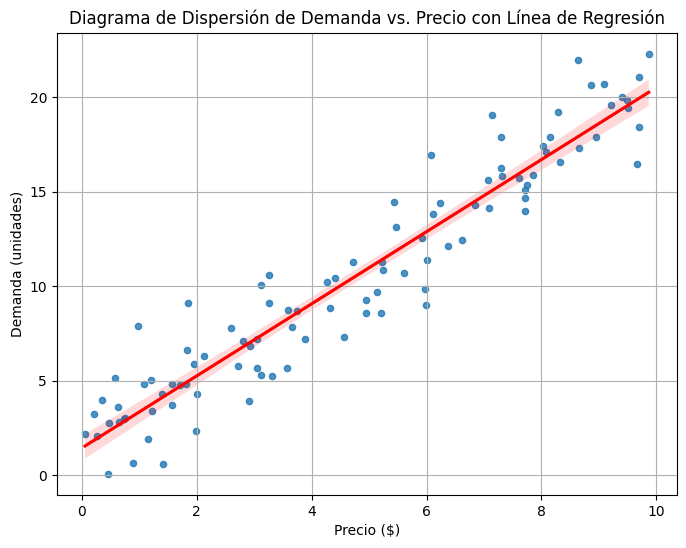

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data (replace with your actual data)
# Assuming Y is your dependent variable (e.g., Demanda del producto)
# Assuming X is your independent variable (e.g., Precio del producto)
np.random.seed(42) # for reproducibility
X = np.random.rand(100) * 10 # Sample prices
Y = 2 * X + 1 + np.random.randn(100) * 2 # Sample demand with some noise


# Create the scatter plot with a regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=X, y=Y, scatter_kws={'s': 20}, line_kws={'color': 'red'}) # Use regplot for scatter plot with regression line
plt.xlabel("Precio ($)") # Replace with your X variable name and units
plt.ylabel("Demanda (unidades)") # Replace with your Y variable name and units
plt.title("Diagrama de Dispersión de Demanda vs. Precio con Línea de Regresión") # Replace with your title
plt.grid(True)
plt.show()

## **Parte 4: Regresión Múltiple y Colinealidad**

Volviendo a tu caso de la Parte 1 (con múltiples variables).

1.  Escribe el **vector de variables** $\vec{X}$ y la **respuesta** $Y$.
2.  Explica cómo interpretarías el **coeficiente** de una de tus variables clave (incluyendo unidades y el sentido de la relación: positiva o negativa).
3.  Si sospecharas que existe **colinealidad** entre tus variables, menciona **dos acciones** que podrías tomar para mitigarla.

**Respuesta (escribe aquí):**

**Respuesta 1:**


*  X1=Demanda histórica promedio (unidades/día)
*  X2=Frecuencia de reposicioˊn del proveedor (día)
*  X3=Tiempo de entrega del proveedor, lead time (día)
*  X4=Existencia de promoción (0 = No, 1 = Si)
*  Y=Nivel de inventario requerido (unidades)

**Respuesta 2:**
1.  Interpretacion:
  *  Variable X4: Si un producto entra en promoción (X4=1), el modelo predice que el inventario requerido aumenta en 120 unidades en comparación de cuando no se tiene promoción.
  *  La relación es positiva, porque las promociones incentivan la demanda.
  *  Unidades: el coeficiente se interpreta como unidades adicionales de inventario asociadas al cambio de estado de la variable categórica (de 0 a 1).

**Respuesta 3:** Si sospechamos que existe alta correlación entre variables como X1(demanda histórica promedio) y X2 (frecuencia de reposición):
1.  Eliminar o combinar variables redundantes: Por ejemplo,  solo usar demanda histórica o derivar una métrica combinada como demanda promedio x frecuencia de reposición.
2.  Aplicar regularización: Utilizar regresión Ridge o Lasso, que penalizan la magnitud de los coeficientes y reducen la inestabilidad provocada por colinealidad.

















---

## **Parte 5: Interacciones y Multicolinealidad (VIF)**

1.  Plantea un caso con una variable $Y$ y entre 4 y 6 variables $X$. ¿Qué término de **interacción** entre dos variables podrías añadir al modelo y **por qué** crees que sería útil?
2.  Si al calcular el Factor de Inflación de la Varianza (VIF) para una variable, obtienes un valor alto (ej. > 10), menciona **dos acciones** que podrías tomar para solucionarlo.

**Respuesta (escribe aquí):**

**Respuesta 1:**


1.1.   Planteamiento

Variable independiente Y

*   Y=Nivel de inventario requerido (unidades)

Variables independientes x

*   X1=Demanda histórica promedio (unidades/día)
*   X2=Frecuencia de reposición del proveedor (días)
*   X3=Tiempo de entrega del proveedor, lead time (días)
*   X4=Existencia de promoción (0 = No, 1 = Si)
*   X5=Variabilidad en la demanda (desviación estándar de ventas)

1.2.   Termino de interaccion
*   X1 x X4= (Demanda histórica promedio) x (Promoción)

    **Utilidad:**
    Permite evidenciar que el efecto de una promoción es mayor en productos de alta demanda que en los de baja demanda.
    Para artículos con alta demanda histórica, una promoción puede disparar aún más las ventas y requerir un mayor nivel de inventario. Para artículos de baja demanda, la promoción puede tener un efecto más moderado.
2. Acciones a tomar para solucionar

  2.1.  Eliminar o combinar variables correlacionadas
  *   Ejemplo: reemplazar X1 y X5 por una sola métrica de demanda ajustada por variabilidad.
  *   Esto reduce la repetición de información y simplifica el modelo.

  2.2. Aplicar regularización
  *   Usar modelos como Ridge o Lasso que penalizan coeficientes grandes y estabilizan el modelo aun en presencia de multicolinealidad.
  *   Esto mantiene todas las variables, pero limita el impacto de las más redundantes.






---

## **Parte 6: Variables Categóricas e Interacciones**

1.  Define una **variable categórica** para tu caso (puedes inventarla si no la tenías). Elige una de sus categorías como el nivel **base** o de referencia y **justifica** tu elección.
2.  Crea una **interacción** entre una variable numérica y la variable categórica que definiste. Explica cómo se interpretaría el coeficiente de esta interacción.

**Respuesta (escribe aquí):**
1.  la variable Tipo de producto con las siguientes categorías:

*   Frescos (frutas, verduras, carnes)
*   Enlatados
*   Carnicos
*   snack

    **Justificacion:** El nivel base escogido es el de Enlatados ya que su demanda tiene a ser mas estable y tiene un menor riesgo de desabastecimiento ya que cuenta con una vida util larga. Facilita comparar cómo los otros tipos de productos afectan el inventario respecto a un grupo estable y menos volátil.
  
2.  Interaccion

    Promoción X Frescos

    Si el coeficiente de la interacción Promoción × Frescos es positivo (por ejemplo, +15), significa que cuando un producto fresco está en promoción, el inventario óptimo debe aumentar en 15 unidades más que cuando la promoción es en enlatados.
    
    En otras palabras: las promociones en productos frescos generan más demanda que en los enlatados, por eso se necesita tener más inventario disponible.




---

## **Parte 7: Conceptos Clave de Clasificación**

Aunque el taller se centra en regresión, estos conceptos son fundamentales en Machine Learning.

1.  Explica qué es la **curva ROC** y para qué se utiliza en un problema de clasificación.
2.  Define el concepto de **accuracy** (exactitud) y menciona una situación en la que podría ser una métrica engañosa.
3.  Describe qué es una **matriz de confusión** y cómo se interpretan sus componentes (Verdaderos Positivos, Falsos Positivos, Verdaderos Negativos, Falsos Negativos).

**Respuesta (escribe aquí):**
1.  La curva ROC es un gráfico que representa el desempeño de un modelo de clasificación binaria a diferentes umbrales de decisión.


*   Eje Y: Tasa de verdaderos positivos TPR o sensibilidad.
*   Eje X: Tasa de falsos positivos FPR.

    **Se utiliza:**


*   Evaluar la capacidad del modelo para distinguir entre clases positivas y negativas.
*   Comparar modelos: un área bajo la curva (AUC) cercana a 1 indica un buen modelo; 0.5 indica un modelo que clasifica al azar.

2.  Es la proporción de predicciones correctas sobre el total de predicciones.

    **Accuracy = VP + VN \ VP + VN + FP + FN**

    donde VP = Verdaderos Positivos, VN = Verdaderos Negativos, FP = Falsos Positivos, FN = Falsos Negativos.

    **Situación engañosa:**

    Supongamos que solo 0.5% de las transacciones son fraudulentas.

    Un modelo que predice siempre “no fraude” tendrá un 99.5% de accuracy, porque la gran mayoría de transacciones no son fraudulentas.

    Aunque la exactitud es altísima, el modelo no detecta ningún fraude, que es precisamente lo que interesa.

3.  Es una tabla que resume el desempeño de un modelo de clasificación mostrando cómo se clasificaron realmente los datos vs. lo que predijo el modelo.



In [ ]:
# Crear la matriz de confusión como un DataFrame
import pandas as pd

confusion_matrix = pd.DataFrame(
    data = [[ "Verdaderos Positivos (VP)", "Falsos Negativos (FN)"],
            [ "Falsos Positivos (FP)", "Verdaderos Negativos (VN)"]],
    index = ["Real Positivo", "Real Negativo"],
    columns = ["Predicho Positivo", "Predicho Negativo"])

display(confusion_matrix)

,Predicho Positivo,Predicho Negativo
Real Positivo,Verdaderos Positivos (VP),Falsos Negativos (FN)
Real Negativo,Falsos Positivos (FP),Verdaderos Negativos (VN)


  **Interpretación de la tabla anterior:**

*   VP: Correctamente identificados como positivos.
*   FN: Positivos reales que el modelo no detectó.
*   FP: Negativos reales que el modelo clasificó como positivos.
*   VN: Correctamente identificados como negativos.

  